In [29]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
dfsolo = pd.read_csv('dfsolo.csv') 
dfduo = pd.read_csv('dfduo.csv')
dfsquad = pd.read_csv('dfsquad.csv')

#In the cleaning notebook, I divided the datasets into solo, duo, and squad mode, and downlaoded them as csv files.

## 1. Are there variables that are particularly significant in terms of explaining the answer to your project question?

The underlying questions for my project is what variables positively correlate with winning a match of Players Unknown Battleground. Winning in this game means being the last player / team standing. To increase threshold of victory we could potentially say 'winning' to be within the top 5 team placement. 

In my previous visualizations I've found that a player doing more damage and getting more kills is the strongest variable correlating with winning a match

## 2. Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?

My mentor has told me that Pearson Correlation values above .4 or below -.4 are to be considered significant, anything in between those values are too close to 0, are thought to be weak correlations.

***<font color=red>When examining the correlations below, its important to remember when looking at the team placement variable that a negative correlation is a good thing, since the lower the team placement number translates into closer to victory (first place).</font>***

Some noteworthy correlations for solo matches to the dependent variable (team placement) are: 

**Solo**

1. Player Kills & Team Placement : -.39
2. Player Distance Walked & Team Placement : -.04 
3. Distance driven & team placement: -.26 

I did not note independent variables that are highly correlated with one another already such as player kills and player damage. Player survival time and team placement is not an interesting high correlation because the trend is a given. 

**Duo**

1. Player Kills & Team Placement : -.33
2. Player Distance Walked & Team Placement : -.55
3. Distance driven & Team placement: -.31

**Squad**

1. Player Kills & Team Placement : -.25
2. Player Distance Walked & Team Placement : -.4 
3. Distance driven & Team placement: -.21

In [31]:
dfsolo.corr() #

,team_placement,player_dist_walk,player_dmg,player_dist_ride,player_survive_time,game_size,party_size,player_kills
team_placement,1.000000,-0.045919,-0.398288,-0.267936,-0.946906,0.003769,NaN,-0.395293
player_dist_walk,-0.045919,1.000000,0.012646,0.640884,0.070603,0.008346,NaN,0.014304
player_dmg,-0.398288,0.012646,1.000000,0.081807,0.389395,0.041910,NaN,0.960075
player_dist_ride,-0.267936,0.640884,0.081807,1.000000,0.281153,0.070863,NaN,0.068391
player_survive_time,-0.946906,0.070603,0.389395,0.281153,1.000000,0.043893,NaN,0.385720
game_size,0.003769,0.008346,0.041910,0.070863,0.043893,1.000000,NaN,0.039941
party_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
player_kills,-0.395293,0.014304,0.960075,0.068391,0.385720,0.039941,NaN,1.000000


In [32]:
dfduo.corr()

,team_placement,player_dist_walk,player_dmg,player_dist_ride,player_survive_time,game_size,party_size,player_kills
team_placement,1.000000,-0.551608,-0.342147,-0.318631,-0.794058,0.004186,NaN,-0.330974
player_dist_walk,-0.551608,1.000000,0.271352,0.050293,0.712818,0.016539,NaN,0.267275
player_dmg,-0.342147,0.271352,1.000000,0.080955,0.373690,0.051381,NaN,0.892617
player_dist_ride,-0.318631,0.050293,0.080955,1.000000,0.407971,0.115461,NaN,0.064243
player_survive_time,-0.794058,0.712818,0.373690,0.407971,1.000000,0.080362,NaN,0.353039
game_size,0.004186,0.016539,0.051381,0.115461,0.080362,1.000000,NaN,0.040654
party_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
player_kills,-0.330974,0.267275,0.892617,0.064243,0.353039,0.040654,NaN,1.000000


In [33]:
dfsquad.corr()

,team_placement,player_dist_walk,player_dmg,player_dist_ride,player_survive_time,game_size,party_size,player_kills
team_placement,1.000000,-0.400415,-0.267238,-0.212695,-0.556652,0.006556,NaN,-0.253025
player_dist_walk,-0.400415,1.000000,0.271316,0.123931,0.749044,0.004079,NaN,0.252901
player_dmg,-0.267238,0.271316,1.000000,0.111747,0.344284,0.015596,NaN,0.889243
player_dist_ride,-0.212695,0.123931,0.111747,1.000000,0.443472,0.039033,NaN,0.089205
player_survive_time,-0.556652,0.749044,0.344284,0.443472,1.000000,0.027072,NaN,0.307293
game_size,0.006556,0.004079,0.015596,0.039033,0.027072,1.000000,NaN,0.021962
party_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
player_kills,-0.253025,0.252901,0.889243,0.089205,0.307293,0.021962,NaN,1.000000


## 3. What are the most appropriate tests to use to analyse these relationships

The player kills variable appears to be somewhat normally distrubuted but heavily skewed to the right

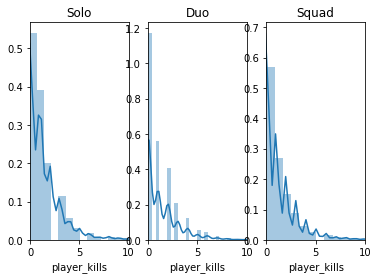

In [34]:
plt.subplot(1, 3, 1)
plt.xlim(0,10)
sns.distplot(dfsolo.player_kills, hist=True)
plt.title('Solo')

plt.subplot(1, 3, 2)
plt.xlim(0,10)
plt.title('Duo')

sns.distplot(dfduo.player_kills, hist=True)

plt.subplot(1, 3, 3)
plt.xlim(0,10)
plt.title('Squad')

sns.distplot(dfsquad.player_kills, hist=True)


Distance Driven appears to be normally distruted

(0, 0.0005)

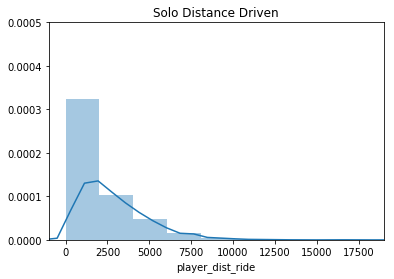

In [35]:
sns.distplot(dfsolo.player_dist_ride)
plt.title('Solo Distance Driven')
plt.xlim(-1000,19000)
plt.ylim(0, .0005)


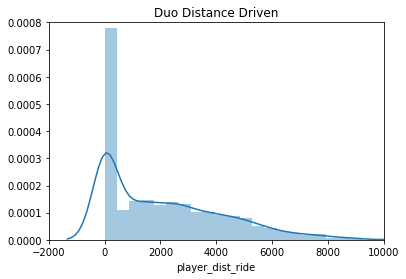

In [36]:
plt.title('Duo Distance Driven')
plt.xlim(-2000,10000)
plt.ylim(0, .0008)

sns.distplot(dfduo.player_dist_ride)

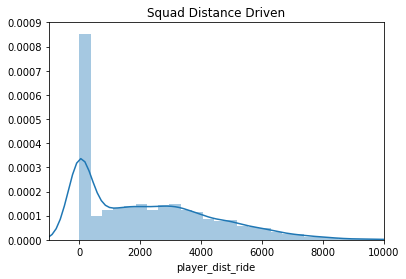

In [37]:
plt.title('Squad Distance Driven')
plt.xlim(-1000,10000)
plt.ylim(0, .0009)

sns.distplot(dfsquad.player_dist_ride)

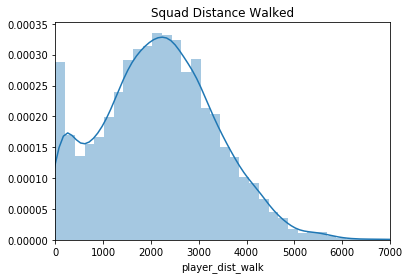

In [38]:
plt.xlim(0, 7000)
plt.title('Squad Distance Walked')
sns.distplot(dfsquad.player_dist_walk)

In [39]:
stats.ttest_ind(dfsolo.player_kills, dfsolo.team_placement)  #The two variables are indefintely correlated

Ttest_indResult(statistic=-92.48542415414045, pvalue=0.0)

In [40]:
stats.ttest_ind(dfsolo.player_dist_ride, dfsolo.player_survive_time) 

Ttest_indResult(statistic=35.623100695467016, pvalue=6.129119164604933e-254)

Using vehicles in late game is typically seen as risk. This is most true when it comes to solo matches because
you don't have teamates to shoot in the back and passenger seats while one person is driving.

Advantages:
-  You can drive where you like to position yourself ideally
-  You probably won't get blue zoned
-  Remain mobile in case of changing circumstances
-  Can hunt down loot boxes that fall from the sky

Disadvantages: 
-  Makes a lot of sound, so enemies can detect you easily, particularly when the zone is smaller
-  You're a big target that many people will shoot at

**The p value of 6% for solo distance driven and survival time leaves the hypothesis of driving vehicles leading to higher survival time open to interpretation.**

In [41]:
stats.ttest_ind(dfduo.player_dist_ride, dfsolo.player_survive_time) 

Ttest_indResult(statistic=54.61829534513544, pvalue=0.0)

In [42]:
stats.ttest_ind(dfsquad.player_dist_ride, dfsolo.player_survive_time) 

Ttest_indResult(statistic=57.59963564372029, pvalue=0.0)

**As expected, for duo and squad matches it is evident by the p value that it is highly probable that the more distance driven in a match, the greater your survival time will be**

I'd like to examine the range of stats for all of the first place players in solo matches.

In [43]:
firstplace = dfsolo[dfsolo.team_placement == 1]

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [44]:
bs_temp = draw_bs_reps(firstplace.player_kills, np.mean, size=1000)
bs_temp_percentile = np.percentile(bs_temp, (2.5, 97.5))
print('Confidence Interval:', bs_temp_percentile)
print('Mean', np.mean(firstplace.player_kills))

Confidence Interval: [6.23843284 8.98656716]
Mean 7.507462686567164


In [45]:
secondplace = dfsolo[dfsolo.team_placement == 2]

bs_temp2 = draw_bs_reps(secondplace.player_kills, np.mean, size=1000)
bs_temp_percentile2 = np.percentile(bs_temp2, (2.5, 97.5))
print('Confidence Interval:', bs_temp_percentile2)
print('Mean:', np.mean(secondplace.player_kills))

Confidence Interval: [2.62121212 3.81818182]
Mean: 3.1666666666666665


**When conducting a bootstrap sampling test 1000 times, we cans see that the mean difference in first and second place is consistently 4 kills.**